# Constrained-Mechanical-Systems-Forward-Dynamic-Simulation-of-Chain-links
Multibody dynamics modeling and numerical methods

## 1 Explicit calculation of the Lagrange multiplier

In [1]:
%matplotlib inline
import time
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
from IPython.display import display, Markdown
import matplotlib as mpl
from Models.models import *
from utils.SolutionDemo import *
sp.init_printing()
mpl.rcParams['figure.dpi'] = 150
repo_dir = os.path.dirname(os.getcwd())

### Double Pendulum

In [6]:
m=[1, 1]
l=[1, 1]
Twobar_Model = ExplictModel(m=m, l=l,close_chain=False)
# y = np.append([0.5, 0, 0, 1.5, 0, 0], np.zeros(3*len(m)))
y0 = [None, None, np.pi/6, None, None, -np.pi/6]
y_dot = [0, None, None, 0.5, None, None]
y = np.concatenate(Twobar_Model.initial_condition(y0, y_dot))
g = np.tile([0, -9.81, 0], len(m))
f = [0, 0, 0, 0, 0, 0]

In [7]:
y

array([ 4.33012702e-01,  2.50000000e-01,  5.23598776e-01,  1.29903811e+00,
        2.50000000e-01, -5.23598776e-01,  0.00000000e+00, -2.54503168e-28,
       -5.87750678e-28,  5.00000000e-01,  8.66025404e-01,  2.00000000e+00])

In [5]:
k = np.tile([1e6], 4)
Twobar_PModel = ApproximateModel(m=m, l=l, k=k, close_chain=False)

### System constrains:

### System governing equations

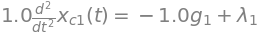

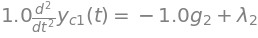

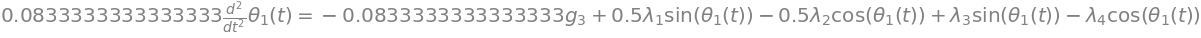

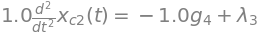

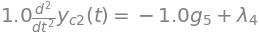

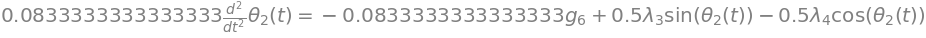

In [3]:
print_constrains(Twobar_Model)
print_govs(Twobar_Model, f)

In [8]:
ode = 'DOP853'
sol = solve_ivp(Twobar_Model.sim, [0, 10], y, method=ode, args=(f, g))
Twobar = SolutionDemo(sol, m, l, rot=None)
print(Twobar.links.shape)

(2, 113, 2, 2)


In [6]:
ode = 'DOP853'
solp = solve_ivp(Twobar_PModel.sim, [0, 10], y, method=ode, args=(f, g))
Twobarp = SolutionDemo(solp, m, l, rot=None)
print(Twobarp.links.shape)

(2, 8199, 2, 2)


In [9]:
Twobar.play_IPython(title=ode)

In [10]:
# Twobarp.play_IPython(title=ode)

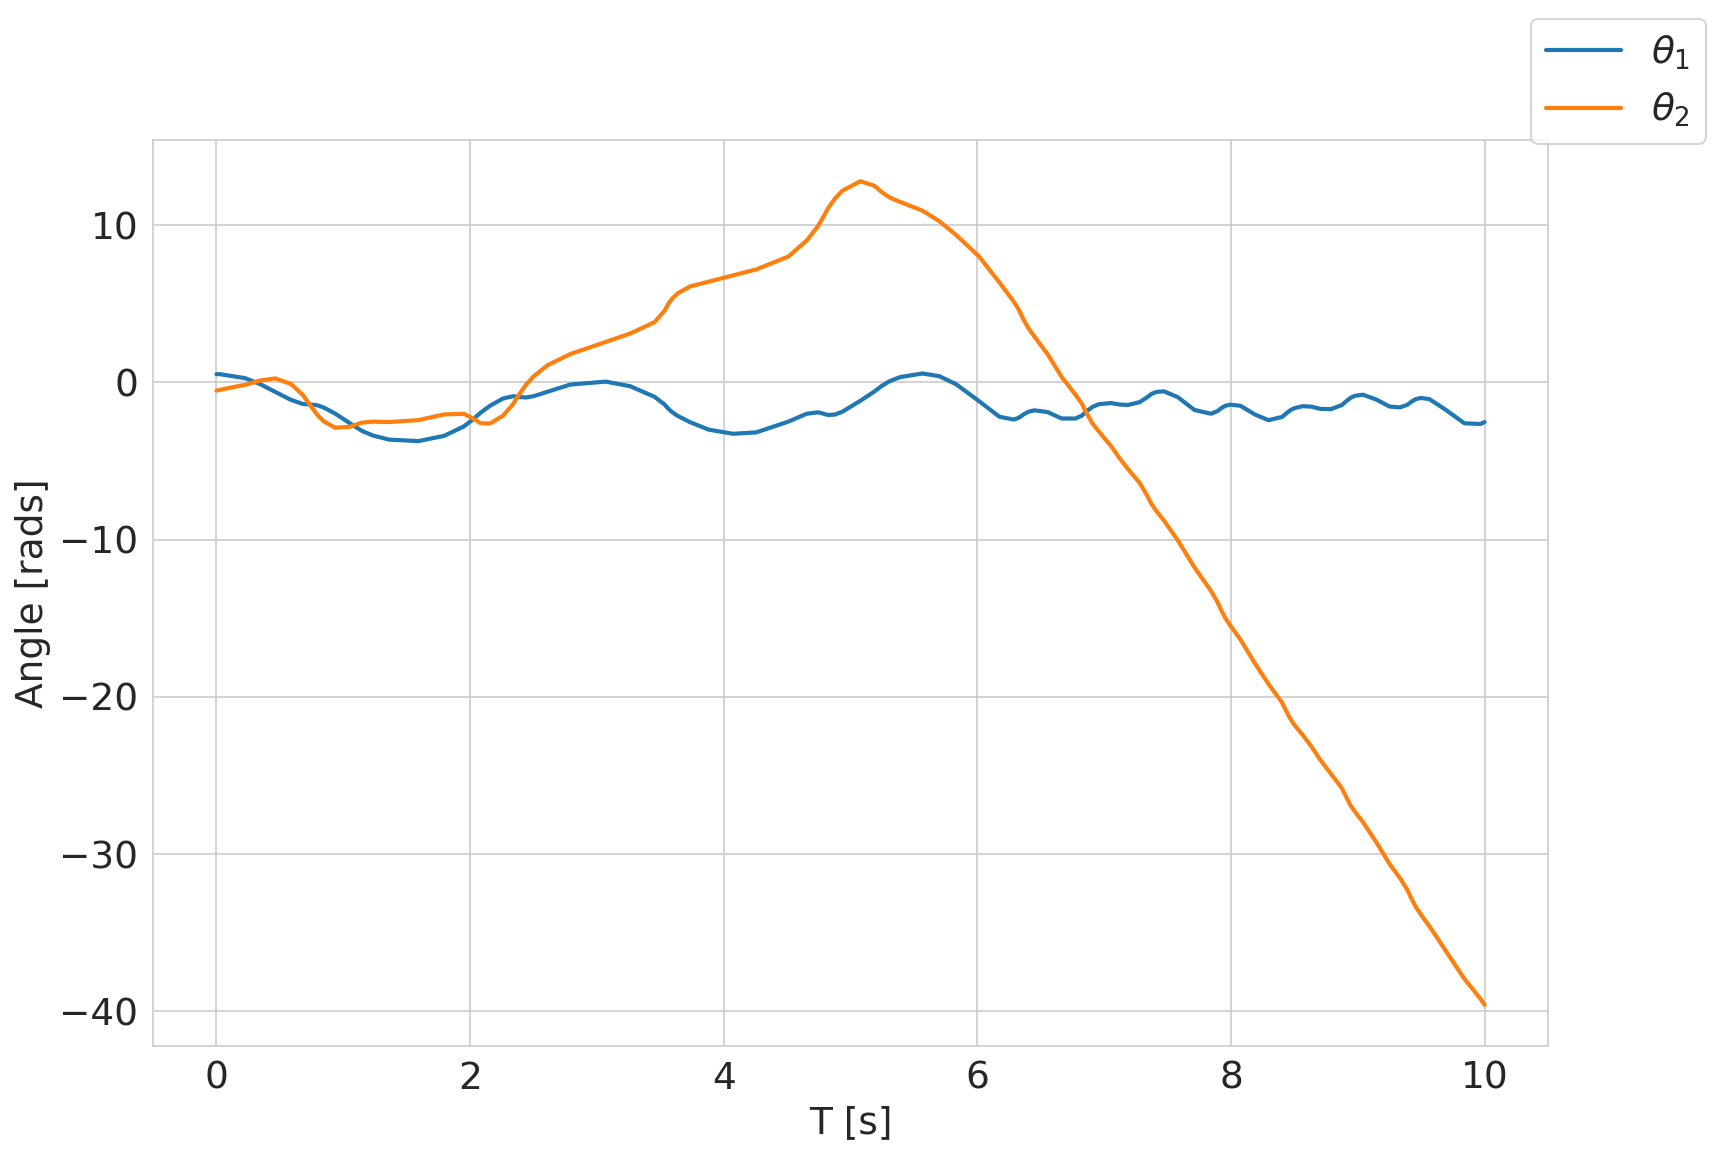

In [10]:
Twobar.plot_angles()

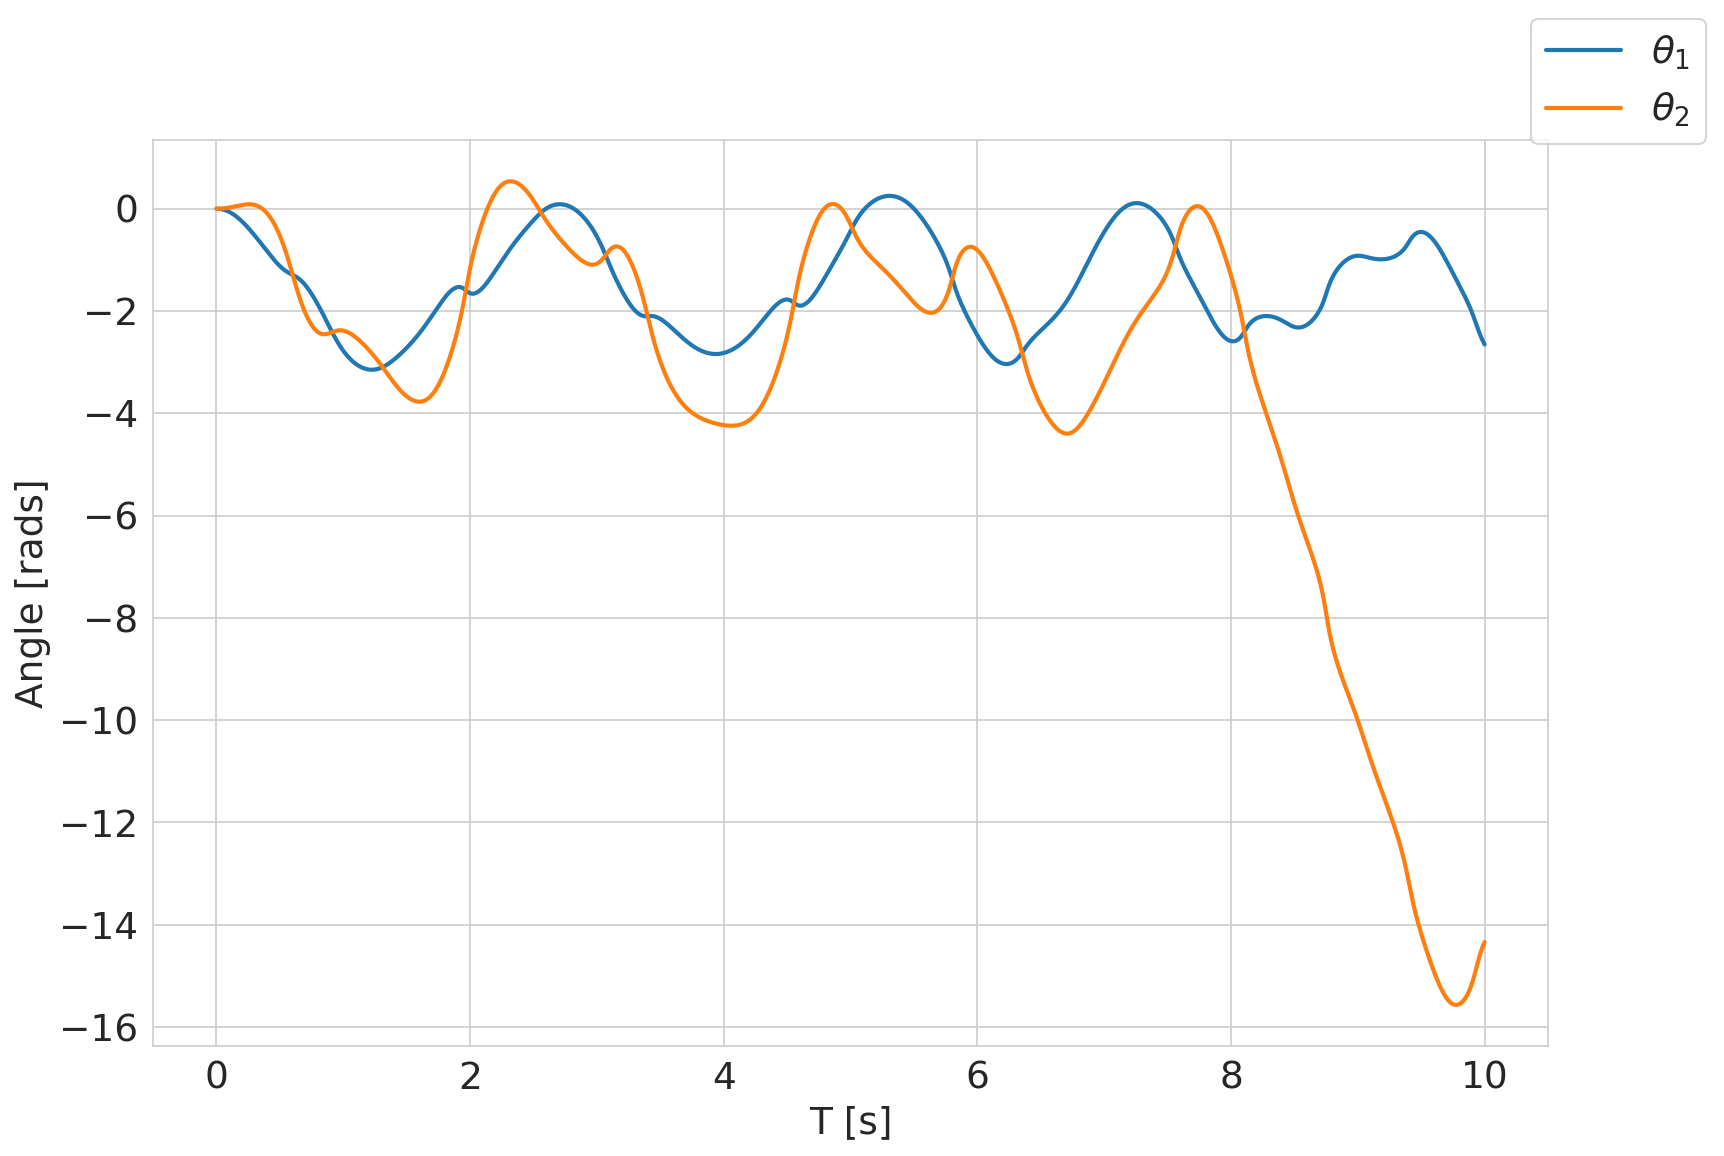

In [7]:
Twobarp.plot_angles()

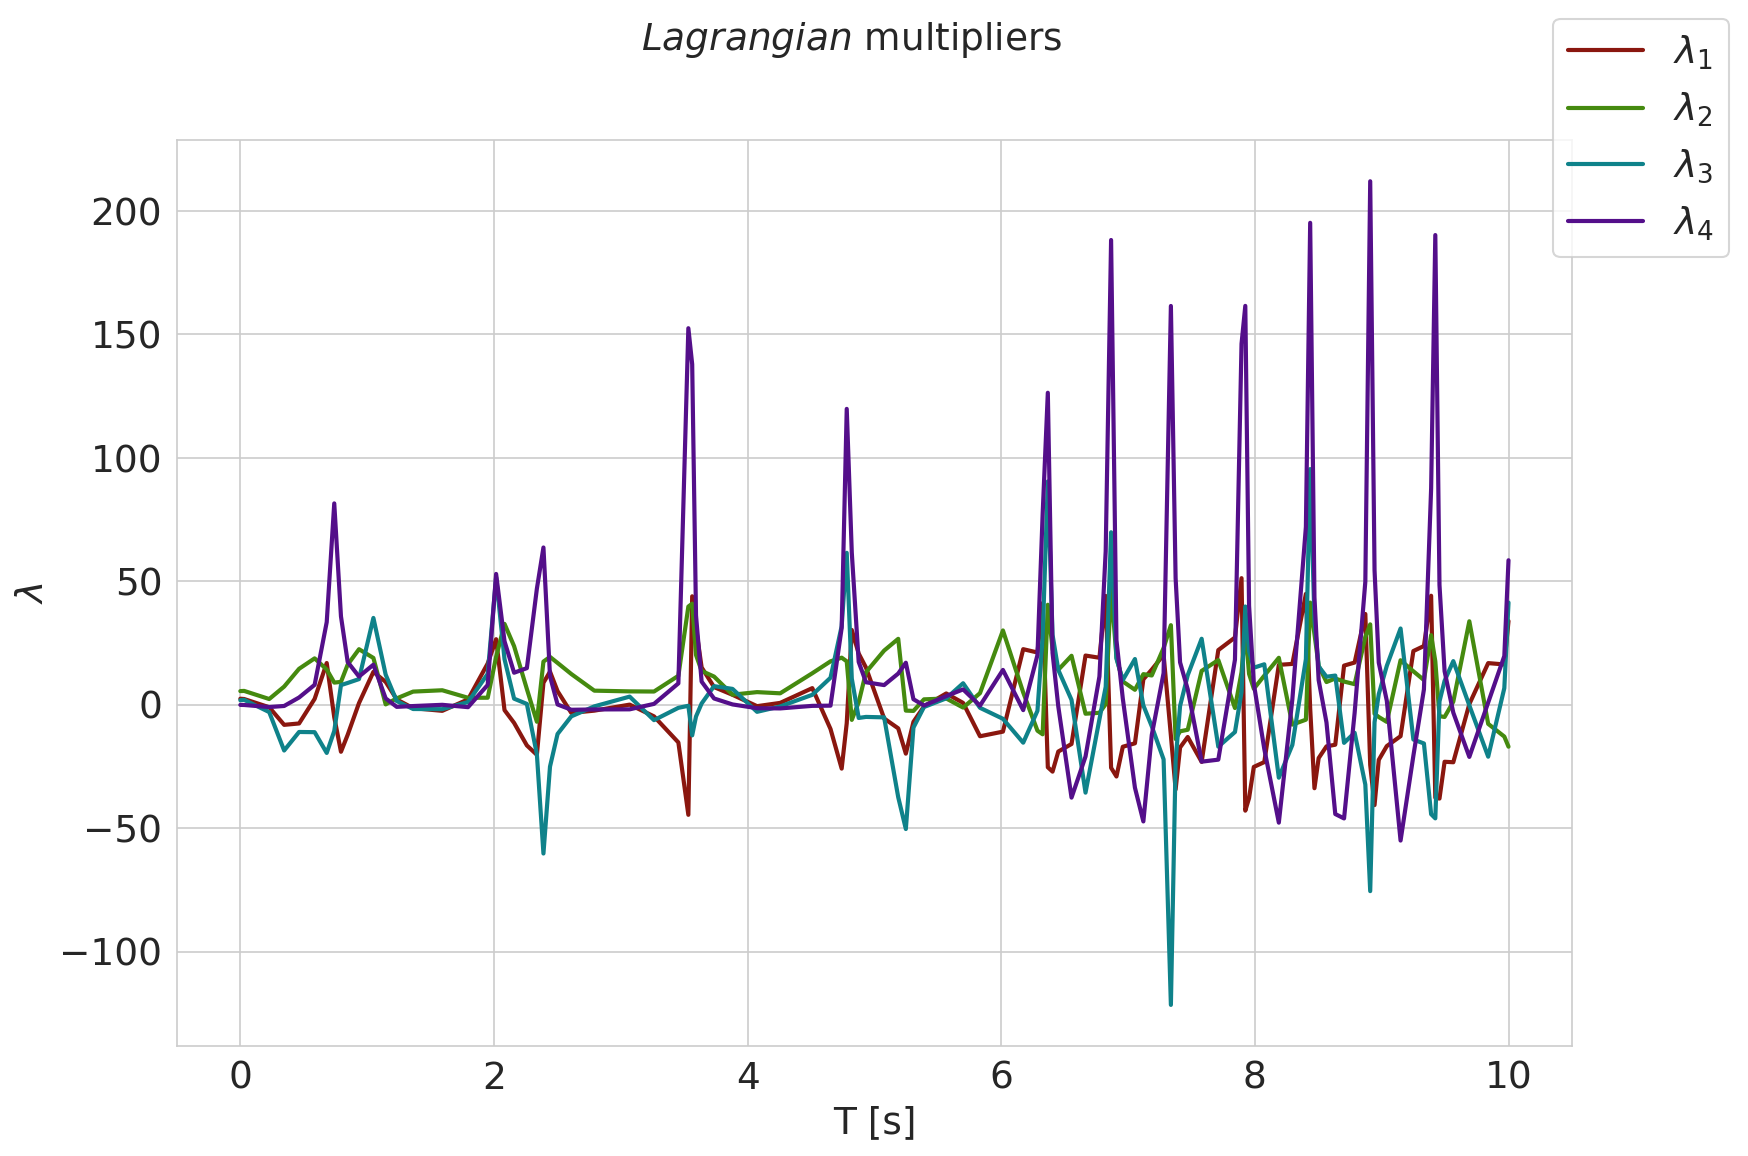

In [11]:
multipliers = get_multipliers(Twobar_Model, f, g, sol, show=True)